In [39]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

First let us begin by framing the problem. The task is to identify the fuel consumption of vehicle given its year, make, model and class etc. So this is a multiple regression since the system is using mulitple features to predict the label(Fuel Consumption), and it is also a univariate regression since we are only trying to predict a single value.

In [40]:
PATH = '../data/fuel_train.csv'
data = pd.read_csv(PATH)
print(data.head())


   Year        MAKE         MODEL            VEHICLE CLASS  ENGINE SIZE  \
0  2000  VOLKSWAGEN           GTI                  COMPACT          2.0   
1  2000       DODGE    DAKOTA 4X4  PICKUP TRUCK - STANDARD          4.7   
2  2000         GMC  C1500 SIERRA  PICKUP TRUCK - STANDARD          4.8   
3  2000        FORD      F150 4X4  PICKUP TRUCK - STANDARD          4.6   
4  2000        FORD      F150 4X4  PICKUP TRUCK - STANDARD          4.2   

   CYLINDERS TRANSMISSION FUEL  FUEL CONSUMPTION  COEMISSIONS   
0          4           M5    X              11.2           228  
1          8           M5    X              18.8           382  
2          8           M5    X              18.9           373  
3          8           A4    X              18.5           380  
4          6           A4    X              17.3           359  


It is evident that we need to encode these cateogorical features, and then check for NaN values, use a method to fill them preferably.  It fills the missing values with the mean of the attribute.(If in case NaN values exist)

In [41]:
data.rename(columns=lambda x: x.strip(), inplace=True)

In [42]:
data[data.duplicated()]

,Year,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSIONS
415,2000,LAND ROVER,DISCOVERY SERIES II 4X4,SUV,4.0,8,A4,Z,19.6,403


In [43]:
#drop the duplicates if there is any
data.drop_duplicates(inplace=True)

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 0 to 510
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              510 non-null    int64  
 1   MAKE              510 non-null    object 
 2   MODEL             510 non-null    object 
 3   VEHICLE CLASS     510 non-null    object 
 4   ENGINE SIZE       510 non-null    float64
 5   CYLINDERS         510 non-null    int64  
 6   TRANSMISSION      510 non-null    object 
 7   FUEL              510 non-null    object 
 8   FUEL CONSUMPTION  510 non-null    float64
 9   COEMISSIONS       510 non-null    int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 43.8+ KB


It is evident that there are no NaN values.



Top 20 most frequent values in "MAKE":
  CHEVROLET: 48 instances
  FORD: 47 instances
  TOYOTA: 37 instances
  DODGE: 37 instances
  VOLKSWAGEN: 29 instances
  GMC: 29 instances
  BMW: 22 instances
  PONTIAC: 19 instances
  AUDI: 18 instances
  VOLVO: 17 instances
  CHRYSLER: 16 instances
  MAZDA: 16 instances
  NISSAN: 16 instances
  MERCEDES-BENZ: 15 instances
  SATURN: 14 instances
  HONDA: 14 instances
  SUZUKI: 13 instances
  DAEWOO: 9 instances
  SUBARU: 9 instances
  SAAB: 7 instances

Top 20 most frequent values in "MODEL":
  LS: 6 instances
  A6 QUATTRO: 5 instances
  DAKOTA: 5 instances
  GOLF: 4 instances
  PASSAT WAGON: 4 instances
  NEW BEETLE: 4 instances
  INTREPID: 4 instances
  RAM 1500: 4 instances
  A4 QUATTRO: 4 instances
  K1500 SIERRA 4X4: 4 instances
  F150: 4 instances
  626: 4 instances
  SUNFIRE: 4 instances
  K1500 SILVERADO 4X4: 4 instances
  C1500 SIERRA: 4 instances
  F150 4X4: 4 instances
  TACOMA 4X4: 4 instances
  CELICA: 4 instances
  JETTA: 4 instanc

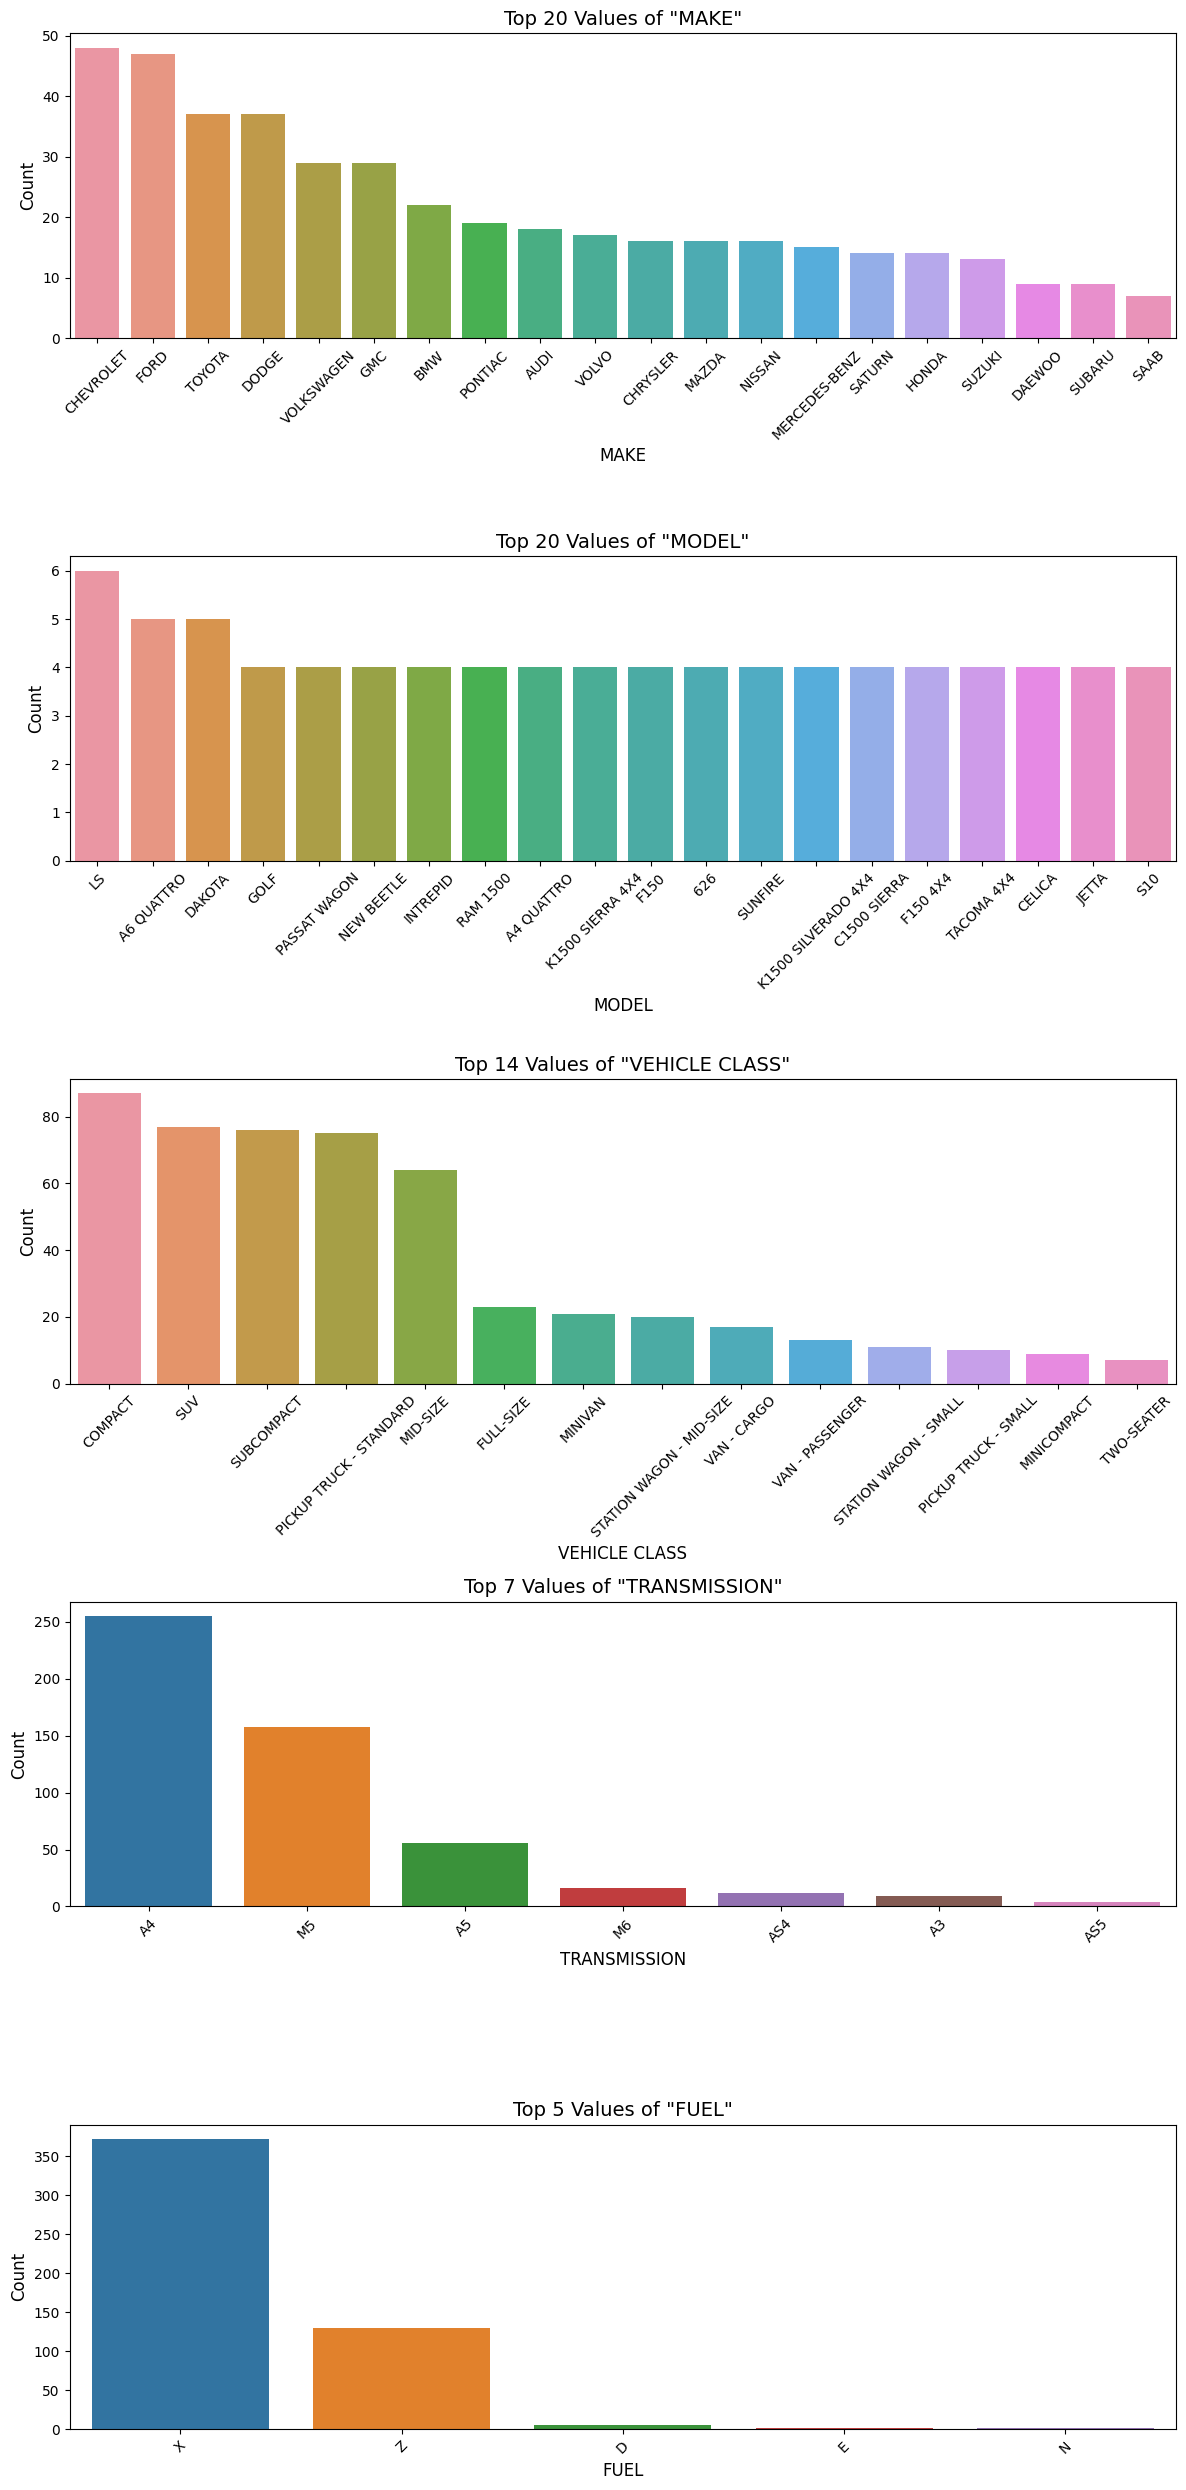

In [45]:
# List of categorical features
cat_features = ['MAKE', 'MODEL', 'VEHICLE CLASS', 'TRANSMISSION', 'FUEL']

# Set up the figure with subplots for each categorical feature
fig, axes = plt.subplots(len(cat_features), 1, figsize=(12, 5*len(cat_features)), squeeze=False)

# Loop over each categorical feature for printing and plotting
for i, feature in enumerate(cat_features):
    value_counts = data[feature].value_counts()
    
    # Handling case where feature has fewer than 10 unique values
    top_counts = value_counts[:20] if len(value_counts) > 20 else value_counts
    
    # Print summary of the top categories
    print(f'\nTop {len(top_counts)} most frequent values in "{feature}":')
    for category, count in top_counts.items():
        print(f'  {category}: {count} instances')
    
    # Plot the top value counts for the current feature
    sns.barplot(x=top_counts.index, y=top_counts.values, ax=axes[i][0])
    axes[i][0].set_title(f'Top {len(top_counts)} Values of "{feature}"', fontsize=14)
    axes[i][0].set_xlabel(feature, fontsize=12)
    axes[i][0].set_ylabel('Count', fontsize=12)
    axes[i][0].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [46]:
data.describe()

,Year,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,COEMISSIONS
count,510.0,510.000000,510.000000,510.000000,510.000000
mean,2000.0,3.205098,5.721569,14.522549,292.998039
std,0.0,1.195067,1.519010,3.159186,63.032798
min,2000.0,1.000000,3.000000,4.900000,104.000000
25%,2000.0,2.200000,4.000000,12.200000,251.000000
50%,2000.0,3.000000,6.000000,14.200000,283.000000
75%,2000.0,4.000000,6.000000,16.500000,336.000000
max,2000.0,8.000000,12.000000,26.300000,495.000000


One thing to note here is that, 75% of the cars in this data have fuel consumption less than 16.5, 50% of the cars have it less than 14.2. The point being that there is no large difference between the values(the values are not that dispersed)


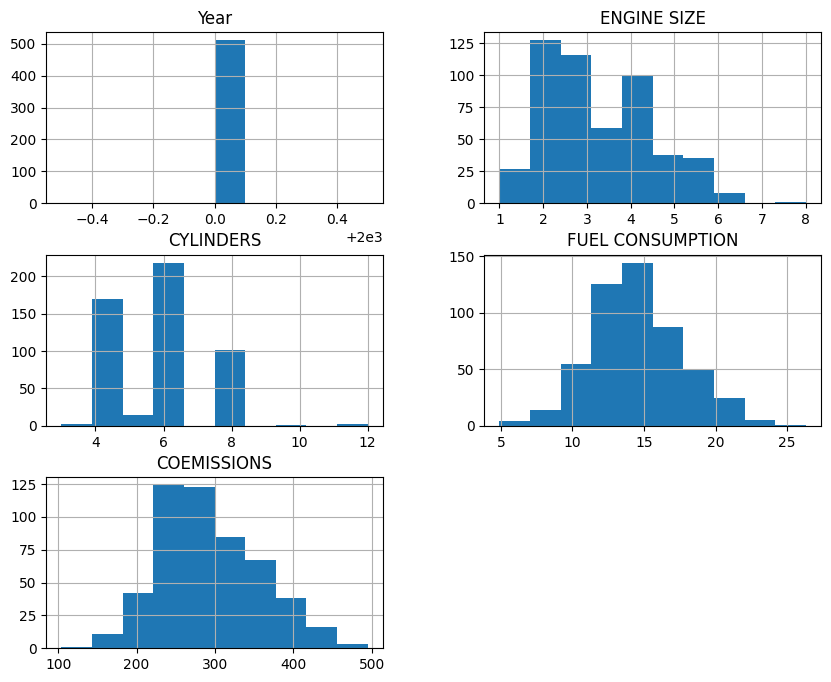

In [47]:
data.hist(figsize=(10, 8))
plt.show()

Key points:

- Diverse feature distributions, predominantly normal
- Varying scales across features
- Presence of multimodal distributions in some features
- Uniform 'year' feature (2000), likely removable from analysis

In [48]:
corr_matrix = data.corr(numeric_only=True)
corr_matrix['FUEL CONSUMPTION'].sort_values(ascending=False)

FUEL CONSUMPTION    1.000000
COEMISSIONS         0.980440
ENGINE SIZE         0.868050
CYLINDERS           0.815932
Year                     NaN
Name: FUEL CONSUMPTION, dtype: float64

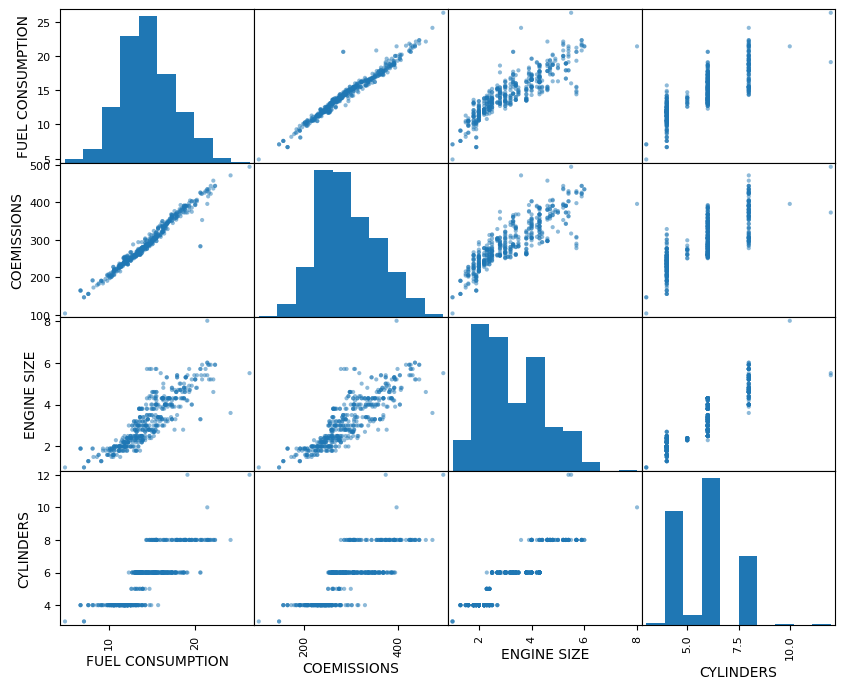

In [49]:
from pandas.plotting import scatter_matrix

attributes = ['FUEL CONSUMPTION', 'COEMISSIONS', 'ENGINE SIZE', 'CYLINDERS']
scatter_matrix(data[attributes], figsize=(10,8));

There is a strong positive correlation between FUEL CONSUMPTION and CO2 EMISSIONS, as shown by the clear upward trend in their scatter plot. Additionally, other relationships, like the effect of ENGINE SIZE and CYLINDERS, are visualized across these comparisons. Now we could also try some combinations of these features, and see if those perform better.

In [50]:
data['cylinders_and_enginesize'] = data['CYLINDERS'] * data['ENGINE SIZE']
corr_matrix = data.corr(numeric_only=True)
corr_matrix['FUEL CONSUMPTION'].sort_values(ascending=True)

CYLINDERS                   0.815932
cylinders_and_enginesize    0.841422
ENGINE SIZE                 0.868050
COEMISSIONS                 0.980440
FUEL CONSUMPTION            1.000000
Year                             NaN
Name: FUEL CONSUMPTION, dtype: float64

engine_size_cylinders_interaction: A feature that captures the interaction between engine size and number of cylinders (ENGINE SIZE * CYLINDERS). This could highlight nonlinear relationships in your model.
